In [1]:
import pandas as pd
import sklearn 
from matplotlib import pyplot as plt


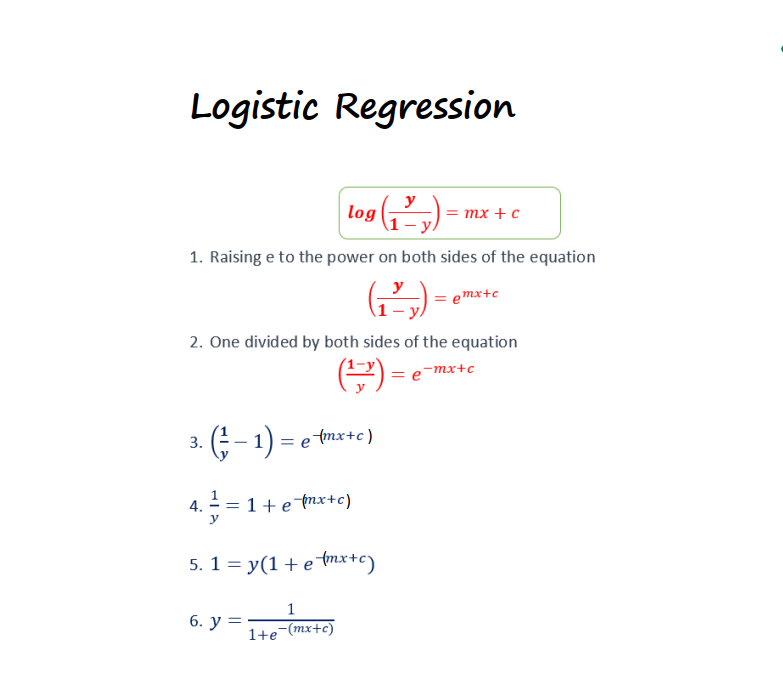

In [2]:
from IPython.display import Image
Image('logit.PNG')


In [3]:
df = pd.read_csv('shoe.csv')

In [4]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [5]:
df1 = df.copy()

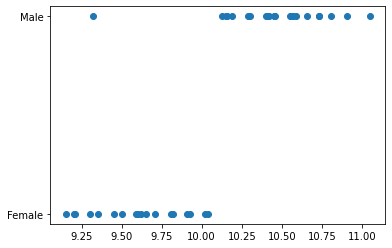

In [6]:
plt.scatter(df['size(cm)'],df['class(y)'])

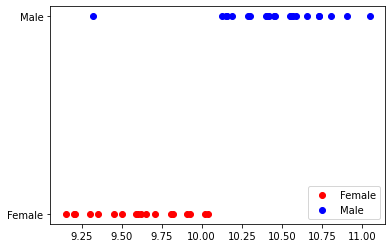

In [7]:
df0 = df[df['class(y)'] == 'Female']
df1 = df[df['class(y)'] == 'Male']

plt.scatter(df0['size(cm)'], df0['class(y)'],color = 'red', label = 'Female')
plt.scatter(df1['size(cm)'], df1['class(y)'], color = 'blue', label = 'Male')

plt.legend()

In [8]:
#preprocessing
df['class(y)'] = df['class(y)'].replace(['Male', 'Female'], [1,0])

In [9]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(df[['size(cm)']], df['class(y)'],test_size=.30) 

In [12]:
xtrain.head()

,size(cm)
28,10.45
34,10.16
30,10.04
31,9.91
39,9.32


In [13]:
ytrain.head()

28    1
34    1
30    0
31    0
39    1
Name: class(y), dtype: int64

In [14]:
 from sklearn.linear_model import LogisticRegression

In [15]:
logis_reg = LogisticRegression()

In [16]:
logis_reg.fit(xtrain, ytrain)

LogisticRegression()

In [17]:
logis_reg.coef_

array([[2.16042168]])

In [18]:
logis_reg.intercept_

array([-21.53255453])

In [19]:
logis_reg.predict_proba(xtest)

array([[0.3274395 , 0.6725605 ],
       [0.85379685, 0.14620315],
       [0.28174324, 0.71825676],
       [0.80855264, 0.19144736],
       [0.20647412, 0.79352588],
       [0.27739201, 0.72260799],
       [0.47131386, 0.52868614],
       [0.18279263, 0.81720737],
       [0.16127524, 0.83872476],
       [0.66473904, 0.33526096],
       [0.58390334, 0.41609666],
       [0.41539295, 0.58460705]])

In [20]:
logis_reg.predict(xtest) #predict result

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [21]:
ytest #actual result

18    1
5     0
32    1
35    0
19    1
2     1
16    0
23    1
29    1
9     0
3     0
1     1
Name: class(y), dtype: int64

In [22]:
 logis = logis_reg.score(xtest,ytest)
logis

0.9166666666666666

# Applying KNN Classifier


In [23]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(n_neighbors=5)
neighbor.fit(xtrain,ytrain)

KNeighborsClassifier()

In [24]:
knn_pred = neighbor.predict(xtest)
knn_pred

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [25]:
ytest

18    1
5     0
32    1
35    0
19    1
2     1
16    0
23    1
29    1
9     0
3     0
1     1
Name: class(y), dtype: int64

In [26]:
knn = neighbor.score(xtest,ytest)
knn

1.0

# Bar Graph

In [27]:
from matplotlib import pyplot as plt

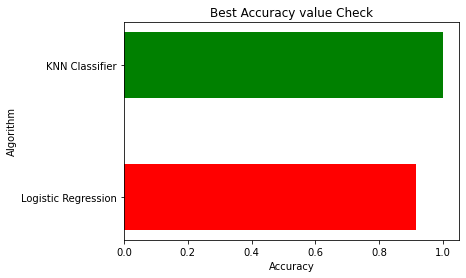

In [28]:
y = ["Logistic Regression", "KNN Classifier"]
w = [logis,knn]
c = ["red","green"]
plt.barh(y,w,0.5,color=c)
plt.title("Best Accuracy value Check")
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.show()

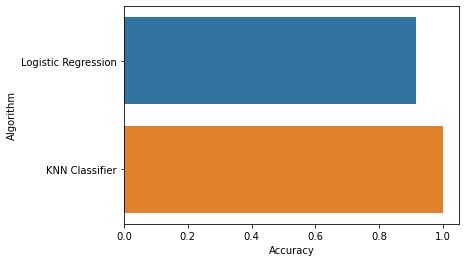

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
labels = ["Logistic Regression", "KNN Classifier"]
accu = [logis,knn]
sns.barplot(x=accu, y=labels)
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.show()